In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.stats import ttest_ind

In [3]:
import statsmodels.stats.multitest as multi
import statsmodels.api as sm

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
import statsmodels.stats.multitest as multi
import statsmodels.api as sm
from sklearn import linear_model

In [6]:
import matplotlib as mpl
import matplotlib

## Get qPCR data

In [16]:
response=pd.read_excel("/cellar/users/mpagadal/projects/germline-immune/data/vicky/20210113 MC38 final expression.xlsx",skiprows=[0,1],index_col=0)

In [17]:
#col=response.columns[0:12].tolist()
response=response[col]
response=response.T
response=response.reset_index()
response["index"]=response["index"].str.split(" ").str[0]

In [9]:
response

SLC11A1
Ttest_indResult(statistic=2.1840503050947127, pvalue=0.07166006374444558)
LAIR1
Ttest_indResult(statistic=-0.920972365790114, pvalue=0.39258920909176026)
CCBL2
Ttest_indResult(statistic=0.8702323884037312, pvalue=0.41762474389112575)
CTSW
Ttest_indResult(statistic=-1.9630736778273028, pvalue=0.09727976539020479)
CTSS
Ttest_indResult(statistic=-2.6913827147915956, pvalue=0.035986352986289244)
LYZ1
Ttest_indResult(statistic=-2.033401077080389, pvalue=0.08824714174079995)
B2M
Ttest_indResult(statistic=1.27406697792192, pvalue=0.24976227684707308)
FCGR28
Ttest_indResult(statistic=0.8706816054293743, pvalue=0.4173979579689625)
HAUS1
Ttest_indResult(statistic=-0.9463184411200829, pvalue=0.38052096354874493)
PSMD2
Ttest_indResult(statistic=-0.3061488896681153, pvalue=0.7698362114068468)
SLC25A40
Ttest_indResult(statistic=-1.087855367852061, pvalue=0.31841516812104076)
TREX1
Ttest_indResult(statistic=-0.9683209887825794, pvalue=0.3702801153404826)


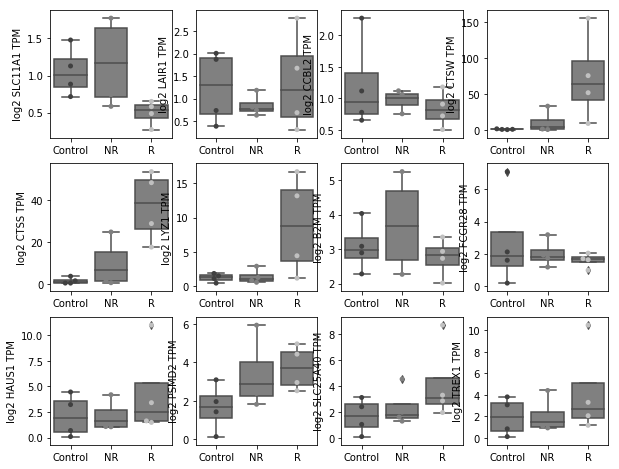

In [10]:
f, axs = plt.subplots(3, 4 ,figsize=(10,8))
axli = axs.flatten()

for i,x in enumerate(response.columns[1:13].tolist()):
    cat1 = response[response["index"]=="NR"]
    cat2 =response[response["index"]=="R"]
    print(x)
    print(ttest_ind(cat1[x], cat2[x]))
    sns.boxplot(x="index", y=x,data=response,color="gray",ax=axli[i])
    sns.swarmplot(x="index", y=x,data=response,palette="gray",ax=axli[i])
    axli[i].set_ylabel("log2 "+x+" TPM")
    axli[i].set_xlabel("")

plt.savefig("../plots/fig6/mc38.mouse.pdf")
    

### run ols between response and gene expression

In [34]:
genes=response.columns[1:].tolist()
mp={"NR":0,"R":1}
response["response_lin"]=response["index"].map(mp)
response_forlin=response[~response["response_lin"].isnull()]

pval=[]
g=[]
beta=[]
se=[]

for x in genes:

    ols = linear_model.LinearRegression()
    X=response_forlin[x].values.reshape(-1, 1)
    y=response_forlin["response_lin"].values.reshape(-1, 1)
        
    X = sm.add_constant(X)
        
    print(X.shape)
    results=sm.OLS(y,X).fit()
    #results=model.fit()
        
    g.append(x)
    pval.append(results.pvalues[1])
    beta.append(results.params[1])
    se.append(results.bse[1])

df=pd.DataFrame({"gene":g,"pval":pval,"beta":beta,"se":se})
df["type"]="mouse"

(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)


In [36]:
df.head()

,gene,pval,beta,se,type
0,SLC11A1,0.071660,-0.656686,0.300673,mouse
1,LAIR1,0.392589,0.236578,0.256878,mouse
2,CCBL2,0.417625,-0.783111,0.899888,mouse
3,CTSW,0.097280,0.006284,0.003201,mouse
4,CTSS,0.035986,0.020063,0.007455,mouse


### Get human data to compare

In [37]:
riaz=pd.read_csv("../data/icb-response/riaz.on.ols.tsv",index_col=0)
riaz["type"]="human"

In [38]:
compiled=df.append(riaz)
compiled=compiled.sort_values(["gene","type"])
compiled["gene-combo"]=compiled["gene"]+"_"+compiled["type"]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 <a list of 38 Text xticklabel objects>)

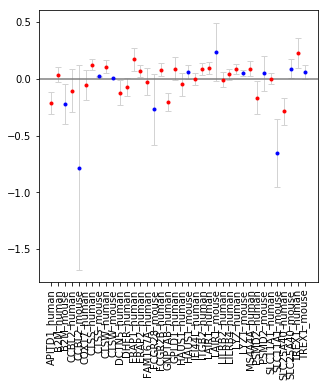

In [40]:
f=plt.figure(figsize=(5,5))
mpl.rcParams['font.size'] = 10
for x in compiled["gene"].unique():
    df=compiled[compiled["gene"]==x]
    for y in df["type"].unique():
        df2=df[df["type"]==y]
        if y =="human":
            plt.errorbar(df2["gene-combo"], df2["beta"], yerr=df2["se"], fmt='.', color='red',
             ecolor='lightgray', elinewidth=1, capsize=3);
        else:
            plt.errorbar(df2["gene-combo"], df2["beta"], yerr=df2["se"], fmt='.', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=3);
            
plt.axhline(0,color="gray")
plt.xticks(rotation=90)

In [41]:
compiled["log10p"]=-np.log10(compiled["pval"])
compiled=compiled.sort_values(by="log10p")

In [42]:
icb_genes=['SLC11A1',
 'CCBL2',
 'LILRB2',
 'CTSS',
 'LAIR1',
 'CTSW',
 'B2M',
 'HAUS1',
 'LILRB4',
 'MS4A4A',
 'SIGLEC5',
 'FCGR2B',
 'LYZ',
 'GNPTAB']

In [19]:
compiled=compiled[compiled["gene"].isin(icb_genes)]

In [54]:
compiled[compiled["type"]=="mouse"]

,gene,pval,beta,se,type,gene-combo,log10p
9,PSMD2,0.769836,0.046325,0.151315,mouse,PSMD2_mouse,0.113602
2,CCBL2,0.417625,-0.783111,0.899888,mouse,CCBL2_mouse,0.379214
7,FCGR28,0.417398,-0.270844,0.311071,mouse,FCGR28_mouse,0.379450
1,LAIR1,0.392589,0.236578,0.256878,mouse,LAIR1_mouse,0.406062
8,HAUS1,0.380521,0.058203,0.061505,mouse,HAUS1_mouse,0.419621
11,TREX1,0.370280,0.061448,0.063458,mouse,TREX1_mouse,0.431470
10,SLC25A40,0.318415,0.089449,0.082225,mouse,SLC25A40_mouse,0.497006
6,B2M,0.249762,-0.222963,0.175001,mouse,B2M_mouse,0.602473
3,CTSW,0.097280,0.006284,0.003201,mouse,CTSW_mouse,1.011977
5,LYZ1,0.088247,0.054371,0.026739,mouse,LYZ1_mouse,1.054299


In [68]:
metal_results=pd.read_csv("../data/icb-response/metal.clean.tsv",delimiter="\t")

In [69]:
significant_genes=metal_results[metal_results["fdr"]<0.05]["file"].unique().tolist()

In [70]:
suggestive_genes=metal_results[metal_results["fdr"]<.1]["file"].value_counts().reset_index()

In [71]:
icb_genes=suggestive_genes[suggestive_genes["file"]>2]["index"].tolist()+significant_genes

In [76]:
compiled=compiled[compiled["gene"].isin(icb_genes)]

In [81]:
compiled[compiled["type"]=="mouse"]["gene"].tolist()

['CCBL2', 'LAIR1', 'HAUS1', 'TREX1', 'B2M', 'CTSW', 'SLC11A1', 'CTSS']

In [84]:
compiled=compiled[compiled["gene"].isin(compiled[compiled["type"]=="mouse"]["gene"].tolist())]

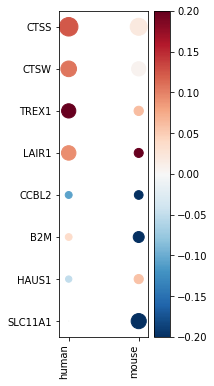

In [88]:
#Plot

def heatmap(x, y, size,color):
    fig, ax = plt.subplots(figsize=(2, 6))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 200
    plt.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, 
        c=color,
        cmap="RdBu_r", vmin=-0.2, vmax=0.2# Vector of square sizes, proportional to size parameter
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    plt.colorbar()
    
    plt.xticks(rotation=90)
    
    
heatmap(
    x=compiled["type"],
    y=compiled["gene"],
    size=compiled["log10p"],
    color=compiled["beta"],
)

plt.savefig("../plots/mouse-validation/mouse.qpcr.validation.pdf")


In [89]:
compiled.sort_values(by="pval")

,gene,pval,beta,se,type,gene-combo,log10p
3,CTSS,0.019338,0.124809,0.050053,human,CTSS_human,1.713579
4,CTSS,0.035986,0.020063,0.007455,mouse,CTSS_mouse,1.443862
5,CTSW,0.059620,0.106677,0.054161,human,CTSW_human,1.224604
0,SLC11A1,0.071660,-0.656686,0.300673,mouse,SLC11A1_mouse,1.144723
4,LAIR1,0.089726,0.092897,0.052705,human,LAIR1_human,1.047084
21,TREX1,0.096744,0.229583,0.133238,human,TREX1_human,1.014377
3,CTSW,0.097280,0.006284,0.003201,mouse,CTSW_mouse,1.011977
6,B2M,0.249762,-0.222963,0.175001,mouse,B2M_mouse,0.602473
11,TREX1,0.370280,0.061448,0.063458,mouse,TREX1_mouse,0.431470
8,HAUS1,0.380521,0.058203,0.061505,mouse,HAUS1_mouse,0.419621


In [20]:
df_size=compiled.copy()

In [21]:
df_size["log10p"]=np.where(df_size["type"]=="mouse",2,df_size["log10p"])
df_size["log10p"]=np.where(df_size["type"]=="human",0.89,df_size["log10p"])

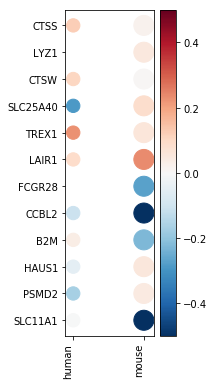

In [22]:
#Plot

def heatmap(x, y, size,color):
    fig, ax = plt.subplots(figsize=(2, 6))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 200
    plt.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, 
        c=color,
        cmap="RdBu_r", vmin=-0.5, vmax=0.5# Vector of square sizes, proportional to size parameter
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    plt.colorbar()
    
    plt.xticks(rotation=90)
    
    
heatmap(
    x=df_size["type"],
    y=df_size["gene"],
    size=df_size["log10p"],
    color=df_size["beta"],
)

plt.savefig("../plots/mouse-validation/mc38/mouse.size.validation.pdf")


## Get growth curve

In [24]:
growth=pd.read_csv("../data/vicky/20210115 MC38 growth curve final.csv",index_col=0)

In [25]:
null=growth.isnull().sum().reset_index()
null_cols=null[null[0]>0]["index"].tolist()

In [26]:
cols=[x for x in growth.columns if x not in null_cols]
growth_notnull=growth[cols]

In [27]:
slopes = growth_notnull.apply(lambda x: np.polyfit(growth_notnull.index, x, 1)[0])

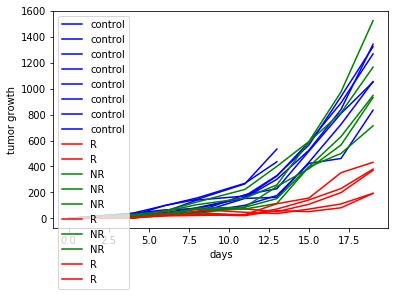

In [29]:
for x in growth.columns:
    if "Control" in x:
        plt.plot(growth.index.tolist(),growth[x].tolist(),color="blue",label="control")
    elif "NR" in x:
        plt.plot(growth.index.tolist(),growth[x].tolist(),color="green",label="NR")
    else:
        plt.plot(growth.index.tolist(),growth[x].tolist(),color="red",label="R")
plt.legend()
plt.ylabel("tumor growth")
plt.xlabel("days")
plt.savefig("../plots/mouse-validation/mc38/growth.curve.pdf")

### Get mouse experiment

In [33]:
exp=pd.read_excel("../data/vicky/20210612-MC38OVA-CTSS.xlsx",sheet_name="Sheet3")
exp.columns=["Days","Control","Control","Control","Control","Anti-PD-1","Anti-PD-1","Anti-PD-1","Anti-PD-1","CTSS inhibitor","CTSS inhibitor","CTSS inhibitor","CTSS inhibitor","Combo","Combo","Combo","Combo"]
exp=pd.melt(exp,id_vars=["Days"],value_vars=exp.columns.tolist()[1:])
exp=exp.drop_duplicates()
exp_filt=exp[exp["Days"]==16]

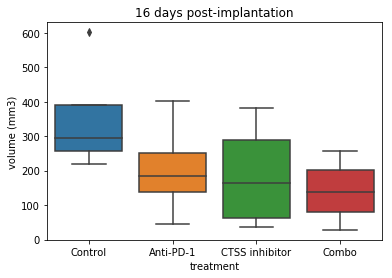

In [34]:
sns.boxplot(x="variable",y="value",data=exp_filt)
plt.xlabel("treatment")
plt.ylabel("volume (mm3)")
plt.title("16 days post-implantation")
plt.savefig("../plots/mouse-validation/mc38/mc38.ctss.pdf")

In [35]:
ttest_ind(exp_filt[exp_filt["variable"]=="Control"]["value"], exp_filt[exp_filt["variable"]=="Anti-PD-1"]["value"])

Ttest_indResult(statistic=1.3126099601172254, pvalue=0.23728555955363934)

In [36]:
ttest_ind(exp_filt[exp_filt["variable"]=="Control"]["value"], exp_filt[exp_filt["variable"]=="CTSS inhibitor"]["value"])

Ttest_indResult(statistic=1.4187845607440657, pvalue=0.20575650651846958)

In [37]:
ttest_ind(exp_filt[exp_filt["variable"]=="Anti-PD-1"]["value"], exp_filt[exp_filt["variable"]=="Combo"]["value"])

Ttest_indResult(statistic=0.7151345978129121, pvalue=0.5013920230027464)

In [38]:
ttest_ind(exp_filt[exp_filt["variable"]=="CTSS inhibitor"]["value"], exp_filt[exp_filt["variable"]=="Combo"]["value"])

Ttest_indResult(statistic=0.4794825431243728, pvalue=0.6485719179624414)

In [40]:
ttest_ind(exp_filt[exp_filt["variable"]=="Control"]["value"], exp_filt[exp_filt["variable"]=="Combo"]["value"])

Ttest_indResult(statistic=2.1497207636817626, pvalue=0.07513523018630226)

### FACS analysis

In [41]:
df=pd.read_excel("../data/vicky/20210512 CTSS staining p values.xlsx",skiprows=[0])

In [42]:
df=df[~df["Unnamed: 0"].isnull()]
df=df[df["Unnamed: 0"]!="p-value"]

In [43]:
df=pd.melt(df,value_vars=["F4/80 CTSS","F4/80 LAIR1","LAIR1+ CTSS+"],id_vars=["Unnamed: 0"])

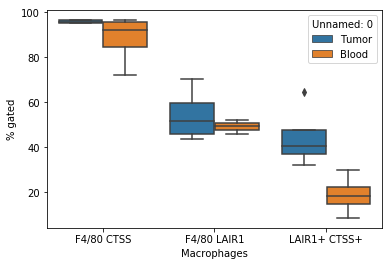

In [44]:
sns.boxplot(x="variable",y="value",hue="Unnamed: 0",data=df)
plt.xlabel("Macrophages")
plt.ylabel("% gated")
plt.savefig("../plots/mouse-validation/mc38/gating.pdf")